In [107]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
os.listdir("data")

['pagecounts-2020-02-01',
 '.DS_Store',
 'labels_en.nt',
 'pageviews.txt',
 'categories.txt',
 'links',
 'pageviews2.txt',
 'article_categories_en.nt',
 'pagecounts-2020-02-01.bz2',
 'pagecounts-2020-01-31']

In [109]:
df = pd.read_csv("data/categories.txt")

In [110]:
df.head()

,page,category
0,Albedo,Climate_forcing
1,Albedo,Climatology
2,Albedo,Electromagnetic_radiation
3,Albedo,Radiometry
4,Albedo,Scattering___absorption_and_radiative_transfer...


In [111]:
# keep top 1000 categories by page count
dft = df.groupby(' category ').agg(len)
dft = dft.sort_values('page', ascending=False).head(1000)
dft['category'] = dft.index
dft = dft[['category']]
df = pd.merge(df,dft, left_on=" category ", right_on="category", how="left")
df.dropna(inplace=True)

In [112]:
df = df[['page','category']]

In [113]:
df.head()

,page,category
25,Achilles,Greek_mythology
80,Abraham_Lincoln,American_people_of_English_descent
114,Actrius,1990s_drama_films
136,Allan_Dwan,American_film_directors
137,Allan_Dwan,American_film_producers


In [114]:
pv1 = pd.read_csv("data/pageviews.txt")

In [115]:
pv1.head()

,page,pageviews
0,!,12
1,!!,2
2,!!!,50
3,!!!Fuck_You!!!,4
4,!!!Fuck_You!!!_And_Then_Some,2


In [116]:
pv2 = pd.read_csv("data/pageviews2.txt")

In [117]:
pv = pd.merge(pv1,pv2,left_on="page", right_on='page', how='left')

In [118]:
pv.head()

,page,pageviews _x,pageviews _y
0,!,12,NaN
1,!!,2,NaN
2,!!!,50,NaN
3,!!!Fuck_You!!!,4,NaN
4,!!!Fuck_You!!!_And_Then_Some,2,NaN


In [119]:
df = pd.merge(pv,df,left_on='page', right_on='page', how='left')

In [121]:
df.head()

,page,pageviews _x,pageviews _y,category
0,!,12,NaN,NaN
1,!!,2,NaN,NaN
2,!!!,50,NaN,American_indie_rock_groups
3,!!!Fuck_You!!!,4,NaN,NaN
4,!!!Fuck_You!!!_And_Then_Some,2,NaN,NaN


In [122]:
del df['category_y']

In [123]:
df.head()

,page,pageviews _x,pageviews _y,category
0,!,12,NaN,NaN
1,!!,2,NaN,NaN
2,!!!,50,NaN,American_indie_rock_groups
3,!!!Fuck_You!!!,4,NaN,NaN
4,!!!Fuck_You!!!_And_Then_Some,2,NaN,NaN


In [125]:
df.columns

Index(['page', ' pageviews _x', ' pageviews _y', 'category'], dtype='object')

In [126]:
df['delta'] = (df[' pageviews _x'] / df[' pageviews _y']) - 1

In [127]:
df.head()

,page,pageviews _x,pageviews _y,category,delta
0,!,12,NaN,NaN,NaN
1,!!,2,NaN,NaN,NaN
2,!!!,50,NaN,American_indie_rock_groups,NaN
3,!!!Fuck_You!!!,4,NaN,NaN,NaN
4,!!!Fuck_You!!!_And_Then_Some,2,NaN,NaN,NaN


In [129]:
cols = []
for col in df.columns:
    cols.append(col.replace(" ",""))
df.columns=cols

Index(['page', 'pageviews_x', 'pageviews_y', 'category', 'delta'], dtype='object')

In [132]:
df.head()

,page,pageviews_x,pageviews_y,category,delta
82,Don't_Look_Now,7,402.0,British_films,-0.982587
83,Don't_Look_Now,7,402.0,Italian_films,-0.982587
84,Don't_Look_Now,7,402.0,English-language_films,-0.982587
85,Don't_Look_Now,7,402.0,Italian-language_films,-0.982587
115,Heroes_(David_Bowie_song),378,22.0,Rock_ballads,16.181818


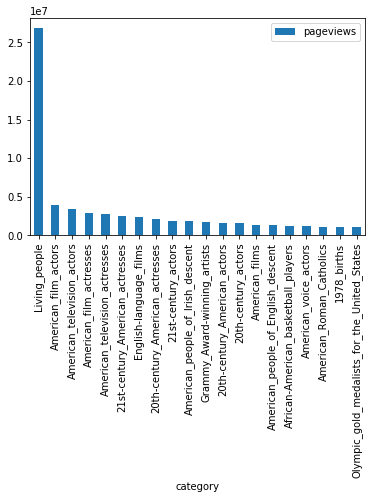

In [145]:
# get top 20 categories by pageviews
gg = pd.DataFrame(df.groupby('category').agg(sum)['pageviews_y'])
gg.columns = ['pageviews']
gg['category'] = gg.index
gg.head()
gg = gg.sort_values('pageviews', ascending=False)
ggt = gg.head(20)
ggt.plot(kind='bar')

In [146]:
# keep only category with most pages
pc = pd.DataFrame(df['category'].value_counts())
pc.columns = ['pagecount']
pc['category'] = pc.index
pc.head()

,pagecount,category
Living_people,256522,Living_people
Year_of_birth_missing_(living_people),19372,Year_of_birth_missing_(living_people)
English-language_films,17497,English-language_films
American_films,11380,American_films
American_film_actors,7738,American_film_actors


In [147]:
# keep only pages in category with most pages among that page
df = pd.merge(df, pc, left_on='category', right_on='category', how='left')
df.drop_duplicates(inplace=True)

In [148]:
df.sort_values(["page","pagecount"], ascending=False, inplace=True)

In [149]:
# only keep most viewed page in each category
df['tmp'] = df.groupby((df['page'] != df['page'].shift(1)).cumsum()).cumcount()+1
df = df[df['tmp'] == 1]
del df['tmp']

In [150]:
df.shape

(529658, 6)

In [151]:
df.sort_values('delta', ascending=True, inplace=True)

In [152]:
df.head(100)

,page,pageviews_x,pageviews_y,category,delta,pagecount
9,Lucky_Luciano,1,2946.0,Deaths_from_myocardial_infarction,-0.999661,2577
16,Stone_Cold_Steve_Austin,3,3466.0,Living_people,-0.999134,256522
1323621,William_R._Kenan___Jr.,1,988.0,American_businesspeople,-0.998988,1766
41069,Carol_Higgins_Clark,21,8307.0,Living_people,-0.997472,256522
365409,Gunnar_Svensson,1,353.0,Living_people,-0.997167,256522
758652,Mary_Higgins_Clark,194,59305.0,Living_people,-0.996729,256522
244232,Enos_John_Mabuza,1,267.0,1939_births,-0.996255,2712
462283,Jake_Shears,240,62717.0,Living_people,-0.996173,256522
495715,Jeff_Dawson,1,239.0,Living_people,-0.995816,256522
88362,Clarence_Harris,13,3092.0,1999_deaths,-0.995796,1616


In [154]:
df.head()

,page,pageviews_x,pageviews_y,category,delta,pagecount
9,Lucky_Luciano,1,2946.0,Deaths_from_myocardial_infarction,-0.999661,2577
16,Stone_Cold_Steve_Austin,3,3466.0,Living_people,-0.999134,256522
1323621,William_R._Kenan___Jr.,1,988.0,American_businesspeople,-0.998988,1766
41069,Carol_Higgins_Clark,21,8307.0,Living_people,-0.997472,256522
365409,Gunnar_Svensson,1,353.0,Living_people,-0.997167,256522


In [156]:
df = df[df['pageviews_x'] > 5]
df = df[df['pageviews_y'] > 5]

In [157]:
df.shape

(249085, 6)

In [158]:
df.sort_values(["category","delta"], ascending = [True, True] ,inplace=True)

In [159]:
df.head()

,page,pageviews_x,pageviews_y,category,delta,pagecount
733641,Margaret_Roper,50,164.0,16th-century_English_people,-0.695122,1190
235256,Elizabeth_Stafford___Countess_of_Sussex,7,21.0,16th-century_English_people,-0.666667,1190
235088,Elizabeth_Raleigh,84,222.0,16th-century_English_people,-0.621622,1190
759953,Mary_Seymour,201,521.0,16th-century_English_people,-0.614203,1190
607799,Kat_Ashley,26,65.0,16th-century_English_people,-0.600000,1190


In [160]:
df['tmp'] = df.groupby((df['category'] != df['category'].shift(1)).cumsum()).cumcount()+1

In [161]:
df = df[df['tmp'] == 1]

In [162]:
df.sort_values('delta').head(100)

,page,pageviews_x,pageviews_y,category,delta,pagecount,tmp
41069,Carol_Higgins_Clark,21,8307.0,Living_people,-0.997472,256522,1
88362,Clarence_Harris,13,3092.0,1999_deaths,-0.995796,1616,1
928052,Peter_Harvey,17,2890.0,1944_births,-0.994118,3318,1
922896,Personal_Affair,8,1087.0,English-language_films,-0.992640,17497,1
1113480,Skunk_Anansie,260,30715.0,English_rock_music_groups,-0.991535,766,1
309907,Gang_of_Four_(band),145,14270.0,Musical_quartets,-0.989839,801,1
1285115,Vincent_Youmans,9,764.0,1898_births,-0.988220,1103,1
698361,Louis_Guss,13,1059.0,American_film_actors,-0.987724,7738,1
1246626,Toni_Jo_Henry,20,1579.0,1916_births,-0.987334,1569,1
738367,Marina_Berti,14,1000.0,1924_births,-0.986000,1993,1


In [163]:
df.to_csv("analysis.csv")

In [164]:
# get top page for top 20 categories
df.head()

,page,pageviews_x,pageviews_y,category,delta,pagecount,tmp
733641,Margaret_Roper,50,164.0,16th-century_English_people,-0.695122,1190,1
94505,Cloudesley_Shovell,14,41.0,17th-century_English_people,-0.658537,766,1
195182,Donald_McKay,6,12.0,1810_births,-0.500000,281,1
1215469,Theophilus_Shepstone,6,14.0,1817_births,-0.571429,277,1
57753,Charles_L._Robinson,6,16.0,1818_births,-0.625000,314,1


In [165]:
ggt.head()

,pageviews,category
category,,
Living_people,26825374.0,Living_people
American_film_actors,3929931.0,American_film_actors
American_television_actors,3389392.0,American_television_actors
American_film_actresses,2916909.0,American_film_actresses
American_television_actresses,2762677.0,American_television_actresses


In [166]:
dft = pd.merge(df, ggt, left_on='category', right_on='category', how='left')

/Users/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 'category' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [168]:
dft.dropna(inplace=True)

In [170]:
dft.shape

(17, 8)

In [171]:
dft.head(20)

,page,pageviews_x,pageviews_y,category,delta,pagecount,tmp,pageviews
257,Magik_(rapper),11,26.0,1978_births,-0.576923,3906,1,1071856.0
373,Erville_Alderson,8,7.0,20th-century_American_actors,0.142857,848,1,1633214.0
374,Helen_Shaw_(actress),23,94.0,20th-century_American_actresses,-0.755319,2260,1,2104201.0
376,Guy_Rolfe,20,241.0,20th-century_actors,-0.917012,2593,1,1579568.0
383,New_York_Renaissance,22,39.0,African-American_basketball_players,-0.435897,1214,1,1281178.0
396,Charles_Joseph_Bonaparte,19,53.0,American_Roman_Catholics,-0.641509,1165,1,1103875.0
419,Louis_Guss,13,1059.0,American_film_actors,-0.987724,7738,1,3929931.0
420,Virginia_Brown_Faire,6,249.0,American_film_actresses,-0.975904,4367,1,2916909.0
423,Jericho_(2000_film),7,259.0,American_films,-0.972973,11380,1,1325897.0
447,Wild_Bill_Hickok,26,1267.0,American_people_of_English_descent,-0.979479,1609,1,1291690.0
